In [16]:
# %load TweetHappiness.py
# Dependencies
import pandas as pd
import numpy as np
import tweepy
import time
import matplotlib.pyplot as plt
import random
from textblob import TextBlob
import datetime

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [17]:

# Twitter API Keys
consumer_key = "Kw6QdU3K6aevWMo7cmOxzThLD"
consumer_secret = "dyMMRVQaDsvJZoBrZGdy1zlk1tHGlgcjijFNhT13oKc3GqJFPy"
access_token = "75068443-RZcsP8ypDdOiQWrQyqiMLic7cgvknrlO6DG5FqAry"
access_token_secret = "Loky5gOKJ3EpYPoYXdDkuOI2BpMKnp7N9cJPq7F1Yxp11"

In [18]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [19]:
public_tweets = api.user_timeline('@CNN', count = 1)
public_tweets[0]['text']

"Black unemployment is at its lowest point on record, yet it's still well above the jobless rate for white, Hispanic… https://t.co/THaz7IQueS"

In [20]:
# wiki = TextBlob("George is very exited about the crypto space")
# target_users = ("@BBC", "@CBS", "@CNN",
#                 "@Fox", "@nytimes")

In [21]:
# tweet = api.user_timeline('@CNN', page=x)
# tweet = tweet[0]["text"]
# txt_textblob = TextBlob(tweet)
# a = txt_textblob.sentiment.polarity
# b = analyzer.polarity_scores(tweet)
# print("TextBlob Analyzer: %s \n Vader Analyzer: %s" %(txt_textblob.sentiment, analyzer.polarity_scores(tweet)))


In [22]:
# Target Account
target_users = ("@BBC", "@CBS", "@CNN",
                "@Fox", "@nytimes")

# Variables for holding sentiments
sentiments = []
for user in target_users:
    # Counter
    counter = 1
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
            # print("Tweet %s: %s" % (counter, tweet["text"]))

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"] #how come I don't need to do tweet
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
#             media = user

            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter,
                               "Media Source": user})

            # Add to counter 
            counter = counter + 1


In [23]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd.replace({'Media Source':{'@BBC': 'BBC',
                                       '@CBS': 'CBS',
                                       '@CNN': 'CNN',
                                       '@Fox': 'Fox',
                                        '@nytimes': 'New York TImes'
                                        }})
sentiments_pd.head()

,Compound,Date,Media Source,Negative,Neutral,Positive,Tweets Ago
0,0.4588,Mon Jan 08 07:38:10 +0000 2018,BBC,0.667,0.000,0.333,1
1,0.2263,Sun Jan 07 20:03:03 +0000 2018,BBC,0.734,0.107,0.158,2
2,0.7351,Sun Jan 07 19:30:04 +0000 2018,BBC,0.721,0.000,0.279,3
3,0.0000,Sun Jan 07 19:25:10 +0000 2018,BBC,1.000,0.000,0.000,4
4,0.0000,Sun Jan 07 19:22:48 +0000 2018,BBC,1.000,0.000,0.000,5


In [24]:
sentiments_pd['Media Source'].unique()

array(['BBC', 'CBS', 'CNN', 'Fox', 'New York TImes'], dtype=object)

In [25]:
sentiments_pd.to_csv('analysis/social_analytics_GSu.csv', sep=',' )

In [26]:
# x_axis_urban = ride_by_city_df[ride_by_city_df['type'] == 'Urban']['Total Rides']
x_axis = sentiments_pd['Tweets Ago']

# Create a random array of data that we will use for our y values
# y_axis_urban = ride_by_city_df[ride_by_city_df['type'] == 'Urban']["Avg Fare"]
y_axis = sentiments_pd['Compound']

size = 80


In [27]:
colors = {'BBC':'Gold', 'CBS':'lightskyblue', 'CNN':'lightcoral', 'Fox':'pink', 'New York Times': 'red'}

fig, ax = plt.subplots(1, 1, figsize=(25,10))
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis[sentiments_pd['Media Source'] == 'CNN'], y_axis[sentiments_pd['Media Source'] == 'CNN'], marker="o", c="gold", s=size*2, alpha=0.75, label = "BBC")
plt.scatter(x_axis[sentiments_pd['Media Source'] == 'CBS'], y_axis[sentiments_pd['Media Source'] == 'CBS'], marker="o", c="lightskyblue", s=size*2, alpha=0.75, label = "CBS")
plt.scatter(x_axis[sentiments_pd['Media Source'] == 'CNN'], y_axis[sentiments_pd['Media Source'] == 'CNN'], marker="o", c="lightcoral", s=size*2, alpha=0.75, label = "CNN")
plt.scatter(x_axis[sentiments_pd['Media Source'] == 'Fox'], y_axis[sentiments_pd['Media Source'] == 'Fox'], marker="o", c="pink", s=size*2, alpha=0.75, label = "Fox")
plt.scatter(x_axis[sentiments_pd['Media Source'] == 'New York Times'], y_axis[sentiments_pd['Media Source'] == 'New York Times'], marker="o", c="red", s=size*2, alpha=0.75, label = "New York Times")

plt.title("Sentiment Analysis of Media Tweets (%s)" %datetime.date.today())
plt.xlabel("Tweet Ago")
plt.ylabel("Polarity Score")
plt.legend(title = "Media Source")

plt.style.use('ggplot')

# The y limits of our scatter plot is 0 to 1
plt.ylim(-1, 1)
# The x limits of our scatter plot is 0 to 100
plt.xlim(100, 0)


(100, 0)

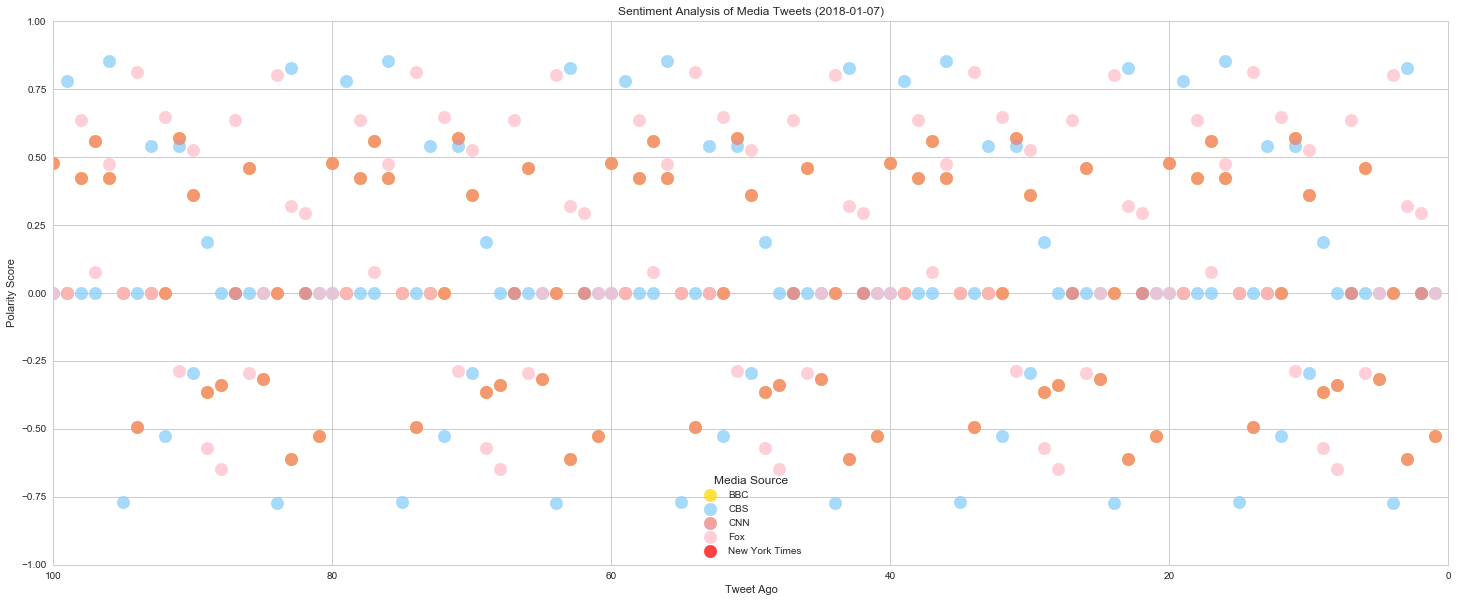

In [28]:
plt.show()

In [29]:

# Variables for holding sentiments
sentiments_textblob = []
for user in target_users:
    # Counter
    counter = 1
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Print Tweets
            # print("Tweet %s: %s" % (counter, tweet["text"]))

            # Run Vader Analysis on each tweet
            testimonial = TextBlob(tweet['text'])
            polarity = testimonial.sentiment.polarity
            tweets_ago = counter
#             media = target

            # Add sentiments for each tweet into an array
            sentiments_textblob.append({"Date": tweet["created_at"], 
                               "Polarity" : polarity,
                               "Tweets Ago": counter,
                               "Media Source": user})

            # Add to counter 
            counter = counter + 1


In [30]:
sentiments_textblob_pd = pd.DataFrame.from_dict(sentiments_textblob)
sentiments_textblob_pd = sentiments_textblob_pd.replace({'Media Source':{'@BBC': 'BBC',
                                                                           '@CBS': 'CBS',
                                                                           '@CNN': 'CNN',
                                                                           '@Fox': 'Fox',
                                                                            '@nytimes': 'New York TImes'
                                                                            }})
sentiments_textblob_pd.head()

,Date,Media Source,Polarity,Tweets Ago
0,Mon Jan 08 07:38:10 +0000 2018,BBC,0.50,1
1,Sun Jan 07 20:03:03 +0000 2018,BBC,0.00,2
2,Sun Jan 07 19:30:04 +0000 2018,BBC,0.05,3
3,Sun Jan 07 19:25:10 +0000 2018,BBC,0.00,4
4,Sun Jan 07 19:22:48 +0000 2018,BBC,0.00,5


In [31]:
sentiments_textblob_pd.describe()

,Polarity,Tweets Ago
count,499.000000,499.000000
mean,0.154133,50.400802
std,0.265903,28.838626
min,-1.000000,1.000000
25%,0.000000,25.500000
50%,0.067273,50.000000
75%,0.300000,75.000000
max,1.000000,100.000000


In [32]:
sentiments_pd.describe()

,Compound,Negative,Neutral,Positive,Tweets Ago
count,500.000000,500.000000,500.00000,500.000000,500.000000
mean,0.151218,0.839970,0.04981,0.110210,50.500000
std,0.395297,0.165388,0.10941,0.144846,28.894979
min,-0.771700,0.193000,0.00000,0.000000,1.000000
25%,0.000000,0.732250,0.00000,0.000000,25.750000
50%,0.000000,0.858000,0.00000,0.000000,50.500000
75%,0.476700,1.000000,0.01525,0.208750,75.250000
max,0.851600,1.000000,0.61000,0.807000,100.000000


In [33]:
# x_axis_urban = ride_by_city_df[ride_by_city_df['type'] == 'Urban']['Total Rides']
x_axis = sentiments_textblob_pd['Tweets Ago']

# Create a random array of data that we will use for our y values
# y_axis_urban = ride_by_city_df[ride_by_city_df['type'] == 'Urban']["Avg Fare"]
y_axis = sentiments_textblob_pd['Polarity']

size = 80


In [34]:
colors = {'BBC':'Gold', 'CBS':'lightskyblue', 'CNN':'lightcoral', 'Fox':'pink', 'New York Times': 'red'}

fig, ax = plt.subplots(1, 1, figsize=(25,10))
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis[sentiments_textblob_pd['Media Source'] == 'BBC'], y_axis[sentiments_textblob_pd['Media Source'] == 'BBC'], marker="o", c="Gold", s=size*2, alpha=0.75, label = "BBC")
plt.scatter(x_axis[sentiments_textblob_pd['Media Source'] == 'CBS'], y_axis[sentiments_textblob_pd['Media Source'] == 'CBS'], marker="o", c="lightskyblue", s=size*2, alpha=0.75, label = "CBS")
plt.scatter(x_axis[sentiments_textblob_pd['Media Source'] == 'CNN'], y_axis[sentiments_textblob_pd['Media Source'] == 'CNN'], marker="o", c="lightcoral", s=size*2, alpha=0.75, label = "CNN")
plt.scatter(x_axis[sentiments_textblob_pd['Media Source'] == 'Fox'], y_axis[sentiments_textblob_pd['Media Source'] == 'Fox'], marker="o", c="pink", s=size*2, alpha=0.75, label = "Fox")
plt.scatter(x_axis[sentiments_textblob_pd['Media Source'] == 'New York Times'], y_axis[sentiments_textblob_pd['Media Source'] == 'New York Times'], marker="o", c="red", s=size*2, alpha=0.75, label = "New York Times")

plt.title("Media Polarity w/ TextBlob (%s)" %datetime.date.today())
plt.xlabel("Tweet Ago")
plt.ylabel("Polarity Score")
plt.legend(title = "Media Source")
# plt.text(45, 35,"Note: \n Circle Size represents the drivers count per city", horizontalalignment='left')
plt.style.use('ggplot')

# The y limits of our scatter plot is 0 to 1
plt.ylim(-1, 1)
# The x limits of our scatter plot is 0 to 100
plt.xlim(100, 0)

(100, 0)

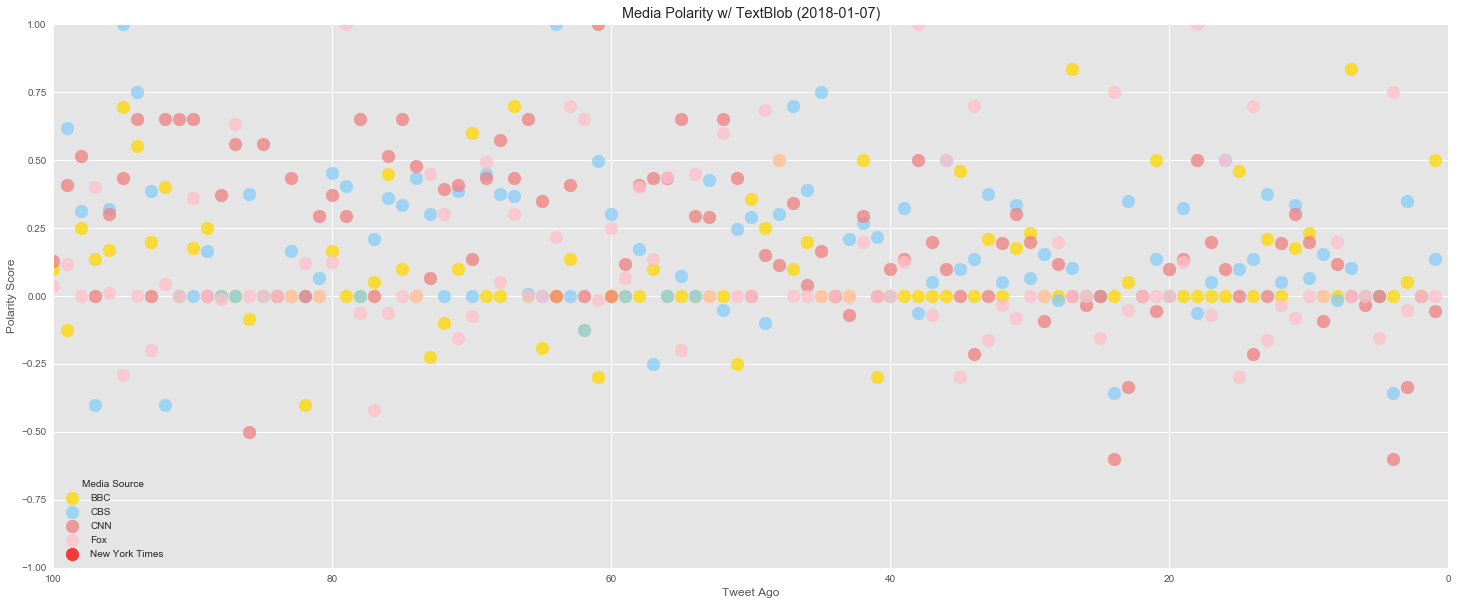

In [35]:
plt.show()

In [70]:
grouped_sentiments_pd = sentiments_pd.groupby('Media Source')
sentiment_avg_pd = grouped_sentiments_pd.mean()
sentiment_avg_pd.sort_values(by=['Compound'], ascending=False, inplace=True)
sentiment_avg_pd = sentiment_avg_pd.reset_index()
sentiment_avg_pd

,Media Source,Compound,Negative,Neutral,Positive,Tweets Ago
0,New York TImes,0.264930,0.84230,0.03010,0.12760,50.5
1,BBC,0.220680,0.83440,0.03220,0.13335,50.5
2,Fox,0.171425,0.75535,0.09505,0.14960,50.5
3,CBS,0.068310,0.89345,0.03905,0.06750,50.5
4,CNN,0.030745,0.87435,0.05265,0.07300,50.5


In [71]:
import seaborn as sns

sns.set(style='whitegrid', color_codes=True)

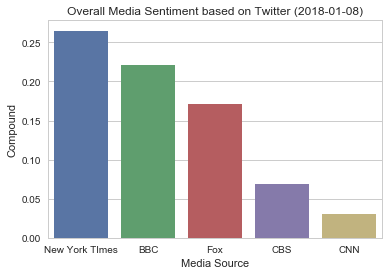

In [72]:
# tips = sns.load_dataset(sentiment_avg_pd)
# sns.barplot(x='Media Source', y = 'Compound', data = tips)

sns.barplot(x=sentiment_avg_pd['Media Source'], y = sentiment_avg_pd.Compound, 
            )
plt.title("Overall Media Sentiment based on Twitter (%s)" %datetime.date.today())

plt.show()


